# #Analyzing Operating ratio and checking if its within the  industry ratio and predicting the future operating ratios for the next 3 years.

In [1]:
#Berry ratio Analaysis for FY 2018-2020
#The Berry ratio compares a company's gross profit to its operating expenses. This ratio is used as an indicator of a company's profit in a given period. A ratio coefficient of 1 or more indicates that the company is making a profit above all variable expenses, whereas a coefficient below 1 indicates that the firm is losing money.

In [2]:
# Import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
import datetime as dt
warnings.filterwarnings("ignore")
import os
import gc
import xgboost as xg
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
#Import Data
Y_2018 = pd.read_csv('PNL_2018.csv')
Y_2019 = pd.read_csv('PNL_2019.csv')
Y_2020 = pd.read_csv('PNL_2020.csv')

In [4]:
Y_2018.head()

,Account,Q_1_2018,Q_2_2018,Q_3_2018,Q_4_2018,Total,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Total Income,34718011.24,27737126.58,34635112.73,25648995.20,1.227392e+08,NaN,NaN,NaN
1,Total Cost of Sales,30620587.92,17169812.82,27008714.21,16314404.09,9.111352e+07,NaN,NaN,NaN
2,Gross Profit,4097423.32,10567313.76,7626398.52,9334591.11,3.162573e+07,NaN,NaN,NaN
3,Expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000 Charity and staff contribution,NaN,30000.00,NaN,70000.00,1.000000e+05,NaN,NaN,NaN


In [5]:
Y_2018.tail()

,Account,Q_1_2018,Q_2_2018,Q_3_2018,Q_4_2018,Total,Unnamed: 6,Unnamed: 7,Unnamed: 8
56,Shipping and delivery expense,119695.38,28401.03,0.00,-4444.05,143652.36,NaN,NaN,NaN
57,Stationery and printing,NaN,395.00,NaN,545.00,940.00,NaN,NaN,NaN
58,Travel expenses - selling expenses,79092.00,124784.00,83600.00,112256.00,399732.00,NaN,NaN,
59,Wage expenses,2300.00,2300.00,NaN,NaN,4600.00,NaN,,NaN
60,Total Expenses,5670322.71,6420618.33,6105973.84,8555525.27,26752440.15,NaN,NaN,NaN


In [6]:
Y_2019.head()

,Account,Q_1_2019,Q_2_2019,Q_3_2019,Q_4_2019,Total,Unnamed: 6
0,Total Income,61300055.36,52068702.35,59405138.39,95587119.38,2.683610e+08,NaN
1,Total Cost of Sales,53027308.00,43109056.45,52307976.84,75225680.84,2.236700e+08,NaN
2,Gross Profit,8272747.36,8959645.90,7097161.55,20361438.54,4.469099e+07,NaN
3,Expenses,NaN,NaN,NaN,NaN,NaN,NaN
4,10000 Charity and staff contribution,150000.00,200000.00,NaN,NaN,3.500000e+05,NaN


In [7]:
Y_2019.tail()

,Account,Q_1_2019,Q_2_2019,Q_3_2019,Q_4_2019,Total,Unnamed: 6
62,Stationery and printing,NaN,9580.00,5797.00,15760.00,31137.00,NaN
63,Travel expenses - general and admin expenses,3280.00,NaN,0.00,1000.00,4280.00,NaN
64,Travel expenses - selling expenses,181660.00,8960.00,236411.13,324356.00,751387.13,NaN
65,Wage expenses,2000.00,NaN,NaN,NaN,2000.00,
66,Total Expenses,7837615.67,7862522.82,9471523.35,12349023.03,37520684.87,


In [8]:
Y_2020.head()

,Account,Q_1_2020,Q_2_2020,Q_3_2020,Q_4_2020,Total,Unnamed: 6,Unnamed: 7
0,Total Income,73681687.08,1.053778e+08,38868499.12,60570857.35,2.784989e+08,NaN,NaN
1,Total Cost of Sales,74912347.33,6.324637e+07,37669324.50,47292449.58,2.231205e+08,NaN,NaN
2,Gross Profit,-1230660.25,4.213148e+07,1199174.62,13278407.77,5.537840e+07,NaN,NaN
3,Expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12000 Zakat,NaN,NaN,0.00,975000.00,9.750000e+05,NaN,NaN


In [9]:
Y_2020.tail()

,Account,Q_1_2020,Q_2_2020,Q_3_2020,Q_4_2020,Total,Unnamed: 6,Unnamed: 7
53,Repairs and Maintenance,34500.00,4500.00,NaN,6000.00,45000.00,NaN,NaN
54,Shipping and delivery expense,0.00,0.00,NaN,NaN,0.00,NaN,NaN
55,Stationery and printing,NaN,NaN,3500.00,10600.00,14100.00,,NaN
56,Travel expenses - general and admin expenses,41400.00,NaN,NaN,NaN,41400.00,NaN,
57,Total Expenses,8763797.88,8847207.12,10289482.16,16204157.18,44104644.34,NaN,NaN


In [10]:
# Selecting rows that have total summation of income, COG and expenses.
#This will give us the data for calculating the ratio and visualizing the changes in the ratio due to change in income and COG for the different quarter.

In [11]:
T_2018 = Y_2018[Y_2018['Account'].str.contains('Total', regex=False, case=False, na=False)]

In [12]:
T_2018.head()

,Account,Q_1_2018,Q_2_2018,Q_3_2018,Q_4_2018,Total,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Total Income,34718011.24,27737126.58,34635112.73,25648995.20,1.227392e+08,NaN,NaN,NaN
1,Total Cost of Sales,30620587.92,17169812.82,27008714.21,16314404.09,9.111352e+07,NaN,NaN,NaN
60,Total Expenses,5670322.71,6420618.33,6105973.84,8555525.27,2.675244e+07,NaN,NaN,NaN


In [13]:
T_2019 = Y_2019[Y_2019['Account'].str.contains('Total', regex=False, case=False, na=False)]

In [14]:
T_2019.head()

,Account,Q_1_2019,Q_2_2019,Q_3_2019,Q_4_2019,Total,Unnamed: 6
0,Total Income,61300055.36,52068702.35,59405138.39,95587119.38,2.683610e+08,NaN
1,Total Cost of Sales,53027308.00,43109056.45,52307976.84,75225680.84,2.236700e+08,NaN
66,Total Expenses,7837615.67,7862522.82,9471523.35,12349023.03,3.752068e+07,


In [15]:
T_2020 = Y_2020[Y_2020['Account'].str.contains('Total', regex=False, case=False, na=False)]

In [16]:
T_2020.head()

,Account,Q_1_2020,Q_2_2020,Q_3_2020,Q_4_2020,Total,Unnamed: 6,Unnamed: 7
0,Total Income,73681687.08,1.053778e+08,38868499.12,60570857.35,2.784989e+08,NaN,NaN
1,Total Cost of Sales,74912347.33,6.324637e+07,37669324.50,47292449.58,2.231205e+08,NaN,NaN
57,Total Expenses,8763797.88,8.847207e+06,10289482.16,16204157.18,4.410464e+07,NaN,NaN


In [17]:
# Checking for null values

In [18]:
T_2018.isnull().sum()

Account       0
Q_1_2018      0
Q_2_2018      0
Q_3_2018      0
Q_4_2018      0
Total         0
Unnamed: 6    3
Unnamed: 7    3
Unnamed: 8    3
dtype: int64

In [19]:
T_2019.isnull().sum()

Account       0
Q_1_2019      0
Q_2_2019      0
Q_3_2019      0
Q_4_2019      0
Total         0
Unnamed: 6    2
dtype: int64

In [20]:
T_2020.isnull().sum()

Account       0
Q_1_2020      0
Q_2_2020      0
Q_3_2020      0
Q_4_2020      0
Total         0
Unnamed: 6    3
Unnamed: 7    3
dtype: int64

In [21]:
#Dropping null values

In [22]:
Y_18 = T_2018.dropna(how='all',axis=1)

In [23]:
Y_19 = T_2019.dropna(how='all',axis=1)

In [24]:
Y_20 = T_2020.dropna(how='all',axis=1)

In [25]:
Y_18.head()

,Account,Q_1_2018,Q_2_2018,Q_3_2018,Q_4_2018,Total
0,Total Income,34718011.24,27737126.58,34635112.73,25648995.20,1.227392e+08
1,Total Cost of Sales,30620587.92,17169812.82,27008714.21,16314404.09,9.111352e+07
60,Total Expenses,5670322.71,6420618.33,6105973.84,8555525.27,2.675244e+07


In [26]:
Y_19.head()

,Account,Q_1_2019,Q_2_2019,Q_3_2019,Q_4_2019,Total,Unnamed: 6
0,Total Income,61300055.36,52068702.35,59405138.39,95587119.38,2.683610e+08,NaN
1,Total Cost of Sales,53027308.00,43109056.45,52307976.84,75225680.84,2.236700e+08,NaN
66,Total Expenses,7837615.67,7862522.82,9471523.35,12349023.03,3.752068e+07,


In [27]:
Y_20.head()

,Account,Q_1_2020,Q_2_2020,Q_3_2020,Q_4_2020,Total
0,Total Income,73681687.08,1.053778e+08,38868499.12,60570857.35,2.784989e+08
1,Total Cost of Sales,74912347.33,6.324637e+07,37669324.50,47292449.58,2.231205e+08
57,Total Expenses,8763797.88,8.847207e+06,10289482.16,16204157.18,4.410464e+07


In [28]:
#Dropping unnamed:6 column

In [29]:
Y_19 = Y_19.drop(columns =['Unnamed: 6'])


In [30]:
Y_19

,Account,Q_1_2019,Q_2_2019,Q_3_2019,Q_4_2019,Total
0,Total Income,61300055.36,52068702.35,59405138.39,95587119.38,2.683610e+08
1,Total Cost of Sales,53027308.00,43109056.45,52307976.84,75225680.84,2.236700e+08
66,Total Expenses,7837615.67,7862522.82,9471523.35,12349023.03,3.752068e+07


In [31]:
# Total revenue, COG and Expenses overview

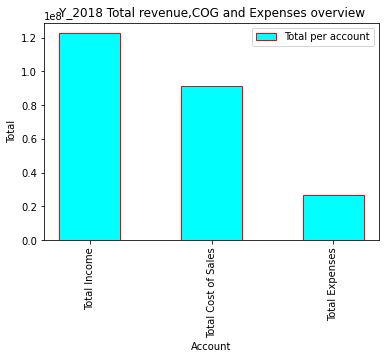

In [32]:
plt.bar(T_2018['Account'], T_2018['Total'], width= 0.5, align='center',color='cyan', edgecolor = 'red')
plt.legend(labels = ['Total per account'])
plt.title("Y_2018 Total revenue,COG and Expenses overview")
plt.xlabel('Account')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.show()

In [33]:
# Quarterely Overview

<AxesSubplot:xlabel='Account'>

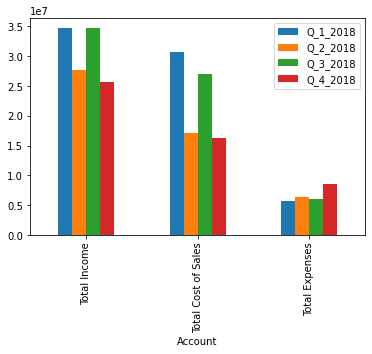

In [34]:
T_2018.plot(x="Account", y=["Q_1_2018", "Q_2_2018", "Q_3_2018","Q_4_2018"], kind="bar")

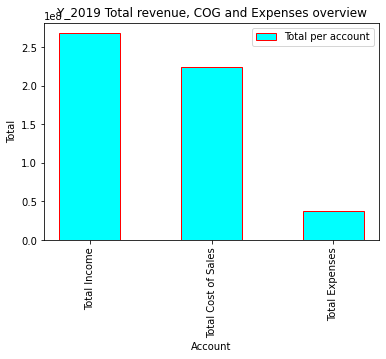

In [35]:
plt.bar(T_2019['Account'], T_2019['Total'], width= 0.5, align='center',color='cyan', edgecolor = 'red')
plt.legend(labels = ['Total per account'])
plt.title("Y_2019 Total revenue, COG and Expenses overview")
plt.xlabel('Account')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Account'>

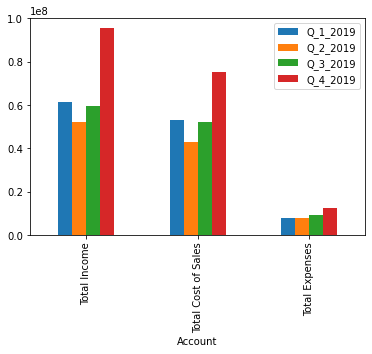

In [36]:
T_2019.plot(x="Account", y=["Q_1_2019", "Q_2_2019", "Q_3_2019","Q_4_2019"], kind="bar")

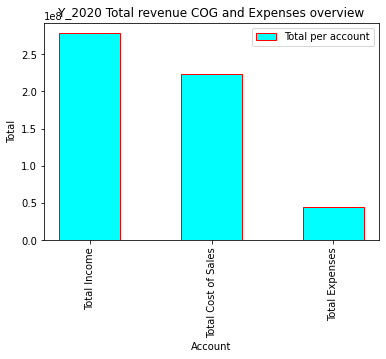

In [37]:
plt.bar(T_2020['Account'], T_2020['Total'], width= 0.5, align='center',color='cyan', edgecolor = 'red')
plt.legend(labels = ['Total per account'])
plt.title("Y_2020 Total revenue COG and Expenses overview")
plt.xlabel('Account')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Account'>

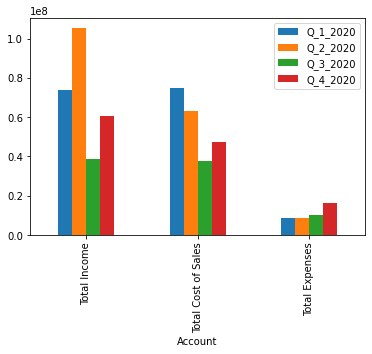

In [38]:
T_2020.plot(x="Account", y=["Q_1_2020", "Q_2_2020", "Q_3_2020","Q_4_2020"], kind="bar")

In [39]:
# Berry ratio per quarter in the FY 2018,2019 and 2020
# Changing the row names for ease of coding

In [40]:
Y_18.index = ['Revenue','COG','Expenses']

In [41]:
Y_19.index = ['Revenue','COG','Expenses']

In [42]:
Y_20.index = ['Revenue','COG','Expenses']

In [43]:
Y_18.head()

,Account,Q_1_2018,Q_2_2018,Q_3_2018,Q_4_2018,Total
Revenue,Total Income,34718011.24,27737126.58,34635112.73,25648995.20,1.227392e+08
COG,Total Cost of Sales,30620587.92,17169812.82,27008714.21,16314404.09,9.111352e+07
Expenses,Total Expenses,5670322.71,6420618.33,6105973.84,8555525.27,2.675244e+07


In [44]:
Y_19.head()

,Account,Q_1_2019,Q_2_2019,Q_3_2019,Q_4_2019,Total
Revenue,Total Income,61300055.36,52068702.35,59405138.39,95587119.38,2.683610e+08
COG,Total Cost of Sales,53027308.00,43109056.45,52307976.84,75225680.84,2.236700e+08
Expenses,Total Expenses,7837615.67,7862522.82,9471523.35,12349023.03,3.752068e+07


In [45]:
Y_20.head()

,Account,Q_1_2020,Q_2_2020,Q_3_2020,Q_4_2020,Total
Revenue,Total Income,73681687.08,1.053778e+08,38868499.12,60570857.35,2.784989e+08
COG,Total Cost of Sales,74912347.33,6.324637e+07,37669324.50,47292449.58,2.231205e+08
Expenses,Total Expenses,8763797.88,8.847207e+06,10289482.16,16204157.18,4.410464e+07


In [46]:
#Calculating the gross margin for FY 2018,2019 AND 2020
#create a new dataframe for columns revenue, COG , expenses and add another column named Gross margin

In [47]:
Y_018 = Y_18.T

In [48]:
Y_019 = Y_19.T

In [49]:
Y_020 = Y_20.T

In [50]:
Y_018.head()

,Revenue,COG,Expenses
Account,Total Income,Total Cost of Sales,Total Expenses
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06


In [51]:
Y_019.head()

,Revenue,COG,Expenses
Account,Total Income,Total Cost of Sales,Total Expenses
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06
Q_2_2019,5.20687e+07,4.31091e+07,7.86252e+06
Q_3_2019,5.94051e+07,5.2308e+07,9.47152e+06
Q_4_2019,9.55871e+07,7.52257e+07,1.2349e+07


In [52]:
Y_020.head()

,Revenue,COG,Expenses
Account,Total Income,Total Cost of Sales,Total Expenses
Q_1_2020,7.36817e+07,7.49123e+07,8.7638e+06
Q_2_2020,1.05378e+08,6.32464e+07,8.84721e+06
Q_3_2020,3.88685e+07,3.76693e+07,1.02895e+07
Q_4_2020,6.05709e+07,4.72924e+07,1.62042e+07


In [53]:
#Deleting asingle row by index value'Account'

In [54]:
Y_018 =Y_018.drop(labels='Account')

In [55]:
Y_019 =Y_019.drop(labels='Account')

In [56]:
Y_020 =Y_020.drop(labels='Account')

In [57]:
Y_018.head()

,Revenue,COG,Expenses
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06
Total,1.22739e+08,9.11135e+07,2.67524e+07


In [58]:
Y_019.head()

,Revenue,COG,Expenses
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06
Q_2_2019,5.20687e+07,4.31091e+07,7.86252e+06
Q_3_2019,5.94051e+07,5.2308e+07,9.47152e+06
Q_4_2019,9.55871e+07,7.52257e+07,1.2349e+07
Total,2.68361e+08,2.2367e+08,3.75207e+07


In [59]:
Y_020.head()

,Revenue,COG,Expenses
Q_1_2020,7.36817e+07,7.49123e+07,8.7638e+06
Q_2_2020,1.05378e+08,6.32464e+07,8.84721e+06
Q_3_2020,3.88685e+07,3.76693e+07,1.02895e+07
Q_4_2020,6.05709e+07,4.72924e+07,1.62042e+07
Total,2.78499e+08,2.2312e+08,4.41046e+07


In [60]:
#Adding Operating margin column by subtracting COG and expenses from Total Income 

In [61]:
Y_018['Profit'] = Y_018.Revenue - Y_018.COG 

In [62]:
Y_019['Profit']  = Y_019.Revenue - Y_019.COG 

In [63]:
Y_020['Profit']  = Y_020.Revenue - Y_020.COG 

In [64]:
Y_018.head()

,Revenue,COG,Expenses,Profit
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06,4.09742e+06
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06,1.05673e+07
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06,7.6264e+06
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06,9.33459e+06
Total,1.22739e+08,9.11135e+07,2.67524e+07,3.16257e+07


In [65]:
Y_019.head()

,Revenue,COG,Expenses,Profit
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06,8.27275e+06
Q_2_2019,5.20687e+07,4.31091e+07,7.86252e+06,8.95965e+06
Q_3_2019,5.94051e+07,5.2308e+07,9.47152e+06,7.09716e+06
Q_4_2019,9.55871e+07,7.52257e+07,1.2349e+07,2.03614e+07
Total,2.68361e+08,2.2367e+08,3.75207e+07,4.4691e+07


In [66]:
Y_020.head()

,Revenue,COG,Expenses,Profit
Q_1_2020,7.36817e+07,7.49123e+07,8.7638e+06,-1.23066e+06
Q_2_2020,1.05378e+08,6.32464e+07,8.84721e+06,4.21315e+07
Q_3_2020,3.88685e+07,3.76693e+07,1.02895e+07,1.19917e+06
Q_4_2020,6.05709e+07,4.72924e+07,1.62042e+07,1.32784e+07
Total,2.78499e+08,2.2312e+08,4.41046e+07,5.53784e+07


In [67]:
Y_018['BerryRatio'] = (Y_018['Profit'] / Y_018['Expenses'])

In [68]:
Y_018

,Revenue,COG,Expenses,Profit,BerryRatio
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06,4.09742e+06,0.722608
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06,1.05673e+07,1.64584
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06,7.6264e+06,1.24901
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06,9.33459e+06,1.09106
Total,1.22739e+08,9.11135e+07,2.67524e+07,3.16257e+07,1.18216


<AxesSubplot:xlabel='BerryRatio'>

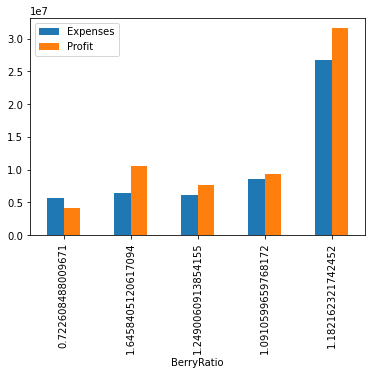

In [69]:
Y_018.plot(x="BerryRatio", y=["Expenses", "Profit"], kind="bar")
#For the financial Year 2018, the company had a berry ratio of 1.18 meaning a profit was made.
# Profit was not significan in the first quarter though as it has a ratio of 0.72. Ther was significant improvementin profitability in the remaining 3 quarter hence pushing the overall operating profit ration to above 1

In [70]:
Y_019['BerryRatio'] = (Y_019['Profit'] / Y_019['Expenses'])

In [71]:
Y_019

,Revenue,COG,Expenses,Profit,BerryRatio
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06,8.27275e+06,1.05552
Q_2_2019,5.20687e+07,4.31091e+07,7.86252e+06,8.95965e+06,1.13954
Q_3_2019,5.94051e+07,5.2308e+07,9.47152e+06,7.09716e+06,0.749316
Q_4_2019,9.55871e+07,7.52257e+07,1.2349e+07,2.03614e+07,1.64883
Total,2.68361e+08,2.2367e+08,3.75207e+07,4.4691e+07,1.1911


<AxesSubplot:xlabel='BerryRatio'>

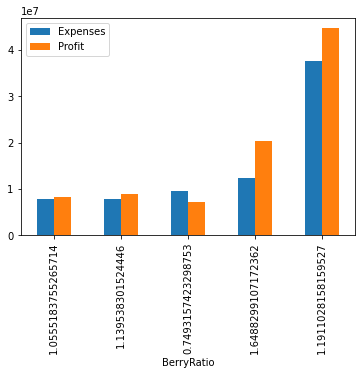

In [72]:
Y_019.plot(x="BerryRatio", y=["Expenses", "Profit"], kind="bar")
#For the financial Year 2019, the company had a berry ratio of 1.19 meaning a profit was made.A 0.01 improvement from year 2018
# Aloss was made in the third quarter though as it has a ratio of 0.74 signifying more expenses were incurred. There was significant improvementin profitability in the remaining Q4 and hence pushing the overall operating profit ration to above 1 as Q1and 2 had ratios above 1.

In [73]:
Y_020['BerryRatio'] = (Y_020['Profit'] / Y_020['Expenses'])

In [74]:
Y_020

,Revenue,COG,Expenses,Profit,BerryRatio
Q_1_2020,7.36817e+07,7.49123e+07,8.7638e+06,-1.23066e+06,-0.140425
Q_2_2020,1.05378e+08,6.32464e+07,8.84721e+06,4.21315e+07,4.76212
Q_3_2020,3.88685e+07,3.76693e+07,1.02895e+07,1.19917e+06,0.116544
Q_4_2020,6.05709e+07,4.72924e+07,1.62042e+07,1.32784e+07,0.819445
Total,2.78499e+08,2.2312e+08,4.41046e+07,5.53784e+07,1.25561


<AxesSubplot:xlabel='BerryRatio'>

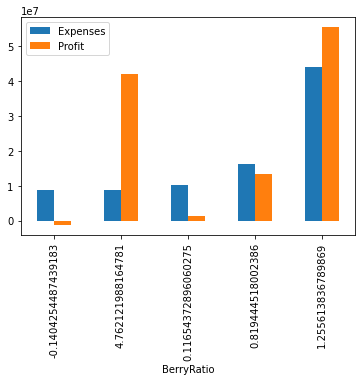

In [75]:
Y_020.plot(x="BerryRatio", y=["Expenses", "Profit"], kind="bar")
#For the financial Year 2020, the company had a berry ratio of 1.25 meaning a profit was made.That is a significant improved of profit by 0.06. 
# A loss was made in the first quarter though as it has a ratio of -0.14. Ther was significant improvementin profitability in the remaining 3 quarter hence pushing the overall operating profit ration to above 1

In [76]:
#When compared to Data from https://www.macrotrends.net/stocks/charts/REGI/renewable-energy/operating-margin the company was --- percent shy from the industry average.

In [77]:
## Data modelling.
##is the companys Operating ratio at per with the industry ratio?

In [78]:
Y_018['operatingprofit'] = Y_018.Revenue - Y_018.COG - Y_018.Expenses

In [79]:
Y_018

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06,4.09742e+06,0.722608,-1.5729e+06
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06,1.05673e+07,1.64584,4.1467e+06
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06,7.6264e+06,1.24901,1.52042e+06
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06,9.33459e+06,1.09106,779066
Total,1.22739e+08,9.11135e+07,2.67524e+07,3.16257e+07,1.18216,4.87329e+06


In [80]:
Y_019['operatingprofit'] = Y_019.Revenue - Y_019.COG - Y_019.Expenses

In [81]:
Y_019

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06,8.27275e+06,1.05552,435132
Q_2_2019,5.20687e+07,4.31091e+07,7.86252e+06,8.95965e+06,1.13954,1.09712e+06
Q_3_2019,5.94051e+07,5.2308e+07,9.47152e+06,7.09716e+06,0.749316,-2.37436e+06
Q_4_2019,9.55871e+07,7.52257e+07,1.2349e+07,2.03614e+07,1.64883,8.01242e+06
Total,2.68361e+08,2.2367e+08,3.75207e+07,4.4691e+07,1.1911,7.17031e+06


In [82]:
Y_020['operatingprofit'] = Y_020.Revenue - Y_020.COG - Y_020.Expenses

In [83]:
Y_020

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit
Q_1_2020,7.36817e+07,7.49123e+07,8.7638e+06,-1.23066e+06,-0.140425,-9.99446e+06
Q_2_2020,1.05378e+08,6.32464e+07,8.84721e+06,4.21315e+07,4.76212,3.32843e+07
Q_3_2020,3.88685e+07,3.76693e+07,1.02895e+07,1.19917e+06,0.116544,-9.09031e+06
Q_4_2020,6.05709e+07,4.72924e+07,1.62042e+07,1.32784e+07,0.819445,-2.92575e+06
Total,2.78499e+08,2.2312e+08,4.41046e+07,5.53784e+07,1.25561,1.12738e+07


In [84]:
#calculating operating margin

In [85]:
Y_018['Operatingmargin'] = (Y_018['operatingprofit'] / Y_018['Revenue'])

In [86]:
Y_018

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit,Operatingmargin
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06,4.09742e+06,0.722608,-1.5729e+06,-0.045305
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06,1.05673e+07,1.64584,4.1467e+06,0.1495
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06,7.6264e+06,1.24901,1.52042e+06,0.0438984
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06,9.33459e+06,1.09106,779066,0.0303741
Total,1.22739e+08,9.11135e+07,2.67524e+07,3.16257e+07,1.18216,4.87329e+06,0.0397044


In [87]:
Y_019['Operatingmargin'] = (Y_019['operatingprofit'] / Y_019['Revenue'])

In [88]:
Y_019

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit,Operatingmargin
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06,8.27275e+06,1.05552,435132,0.00709839
Q_2_2019,5.20687e+07,4.31091e+07,7.86252e+06,8.95965e+06,1.13954,1.09712e+06,0.0210707
Q_3_2019,5.94051e+07,5.2308e+07,9.47152e+06,7.09716e+06,0.749316,-2.37436e+06,-0.039969
Q_4_2019,9.55871e+07,7.52257e+07,1.2349e+07,2.03614e+07,1.64883,8.01242e+06,0.0838232
Total,2.68361e+08,2.2367e+08,3.75207e+07,4.4691e+07,1.1911,7.17031e+06,0.0267189


In [89]:
Y_020['Operatingmargin'] = (Y_020['operatingprofit'] / Y_020['Revenue'])

In [90]:
Y_020

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit,Operatingmargin
Q_1_2020,7.36817e+07,7.49123e+07,8.7638e+06,-1.23066e+06,-0.140425,-9.99446e+06,-0.135644
Q_2_2020,1.05378e+08,6.32464e+07,8.84721e+06,4.21315e+07,4.76212,3.32843e+07,0.315856
Q_3_2020,3.88685e+07,3.76693e+07,1.02895e+07,1.19917e+06,0.116544,-9.09031e+06,-0.233873
Q_4_2020,6.05709e+07,4.72924e+07,1.62042e+07,1.32784e+07,0.819445,-2.92575e+06,-0.0483029
Total,2.78499e+08,2.2312e+08,4.41046e+07,5.53784e+07,1.25561,1.12738e+07,0.0404804


<AxesSubplot:xlabel='operatingprofit'>

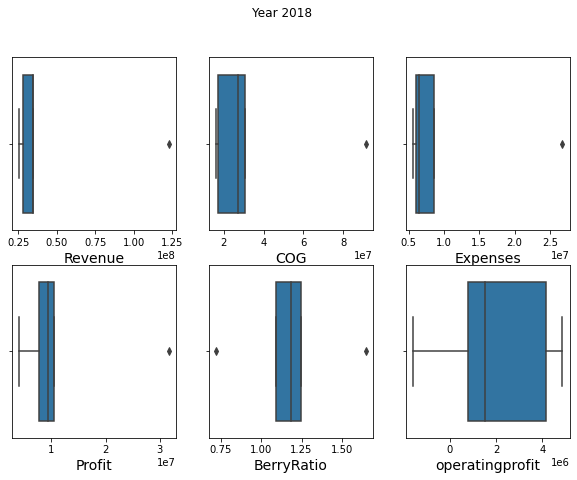

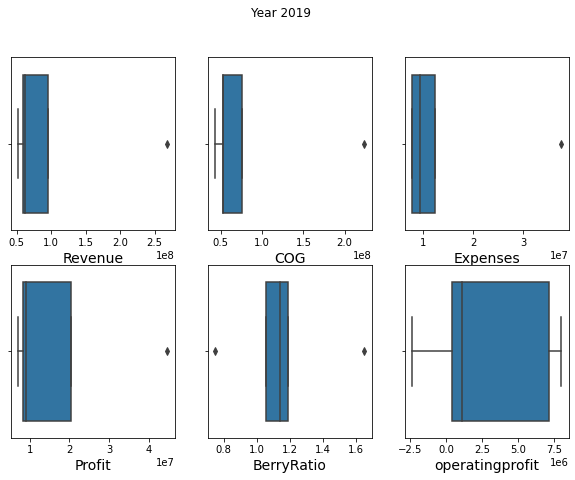

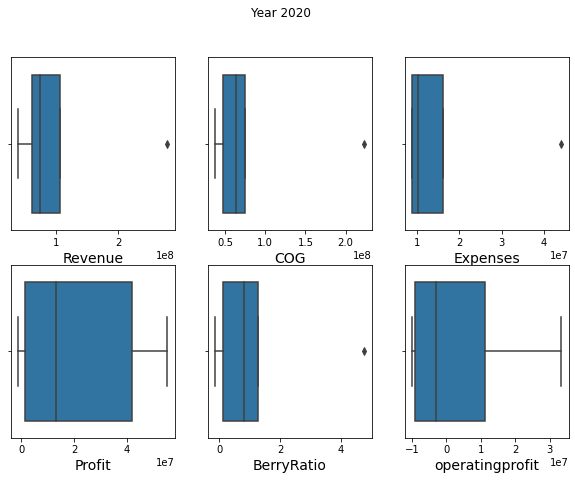

In [91]:
#visualize outliers
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10, 7))
fig.suptitle('Year 2018')
ax1.set_xlabel('xlabel',fontsize=14)
ax2.set_xlabel('xlabel',fontsize=14)
ax3.set_xlabel('xlabel',fontsize=14)
ax4.set_xlabel('xlabel',fontsize=14)
ax5.set_xlabel('xlabel',fontsize=14)
ax6.set_xlabel('xlabel',fontsize=14)
sns.boxplot(Y_018['Revenue'], ax=ax1)
sns.boxplot(Y_018['COG'], ax=ax2)
sns.boxplot(Y_018['Expenses'], ax=ax3)
sns.boxplot(Y_018['Profit'], ax=ax4)
sns.boxplot(Y_018['BerryRatio'], ax=ax5)
sns.boxplot(Y_018['operatingprofit'], ax=ax6)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10, 7))
fig.suptitle('Year 2019')
ax1.set_xlabel('xlabel',fontsize=14)
ax2.set_xlabel('xlabel',fontsize=14)
ax3.set_xlabel('xlabel',fontsize=14)
ax4.set_xlabel('xlabel',fontsize=14)
ax5.set_xlabel('xlabel',fontsize=14)
ax6.set_xlabel('xlabel',fontsize=14)
sns.boxplot(Y_019['Revenue'], ax=ax1)
sns.boxplot(Y_019['COG'], ax=ax2)
sns.boxplot(Y_019['Expenses'], ax=ax3)
sns.boxplot(Y_019['Profit'], ax=ax4)
sns.boxplot(Y_019['BerryRatio'], ax=ax5)
sns.boxplot(Y_019['operatingprofit'], ax=ax6)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10, 7))
fig.suptitle('Year 2020')
ax1.set_xlabel('xlabel',fontsize=14)
ax2.set_xlabel('xlabel',fontsize=14)
ax3.set_xlabel('xlabel',fontsize=14)
ax4.set_xlabel('xlabel',fontsize=14)
ax5.set_xlabel('xlabel',fontsize=14)
ax6.set_xlabel('xlabel',fontsize=14)
sns.boxplot(Y_020['Revenue'], ax=ax1)
sns.boxplot(Y_020['COG'], ax=ax2)
sns.boxplot(Y_020['Expenses'], ax=ax3)
sns.boxplot(Y_020['Profit'], ax=ax4)
sns.boxplot(Y_020['BerryRatio'], ax=ax5)
sns.boxplot(Y_020['operatingprofit'], ax=ax6)



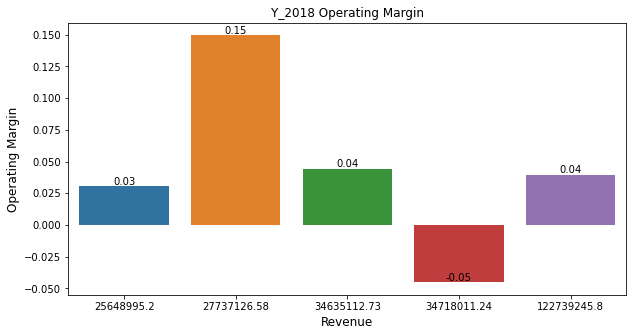

In [92]:
plt.figure(figsize=(10,5))
plots=sns.barplot(y= 'Operatingmargin', x = 'Revenue', data= Y_018)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    plt.xlabel("Revenue", size=12 )
    plt.ylabel("Operating Margin", size=12)
    plt.title("Y_2018 Operating Margin")
    plt.show
    
    
 
    
    
    

In [93]:
#The company operating profit for the year 2018 through the quarters was below the industry average by 5.3%
#The industry average was 9.3%
#The company average was 4%

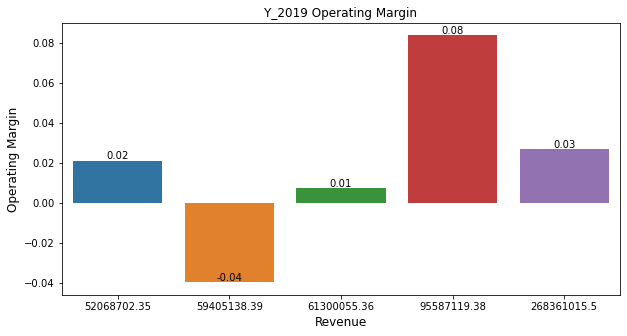

In [94]:
 plt.figure(figsize=(10,5))
plots=sns.barplot(y= 'Operatingmargin', x = 'Revenue', data= Y_019)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    plt.xlabel("Revenue", size=12 )
    plt.ylabel("Operating Margin", size=12)
    plt.title("Y_2019 Operating Margin")
    plt.show
    

In [95]:
#The company operating profit for the year 2018 through the quarters was below the industry average by 7.57%
#The industry average was 10.57%
#The company average was 3%

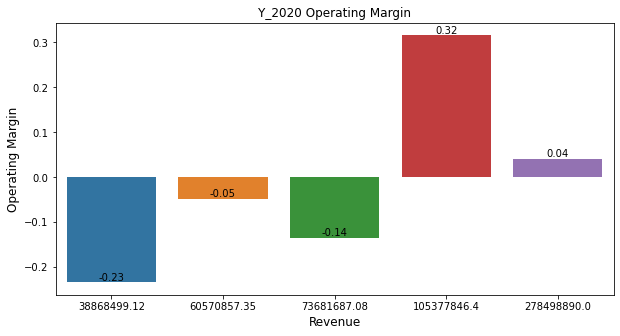

In [96]:
plt.figure(figsize=(10,5))
plots=sns.barplot(y= 'Operatingmargin', x = 'Revenue', data= Y_020)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    plt.xlabel("Revenue", size=12 )
    plt.ylabel("Operating Margin", size=12)
    plt.title("Y_2020 Operating Margin")
    plt.show

In [97]:
#The company operating profit for the year 2018 through the quarters was below the industry average by 12.96%
#The industry average was 16.96%
#The company average was 4%

In [98]:
#The company operating profit tend to range between 3% and 4% within the years.
#The variance from the industry average though have an upward trend from 2018-2020

In [99]:
frames = [Y_018,Y_019,Y_020]

In [100]:
hypothesis_df= pd.concat(frames)

In [101]:
hypothesis_df

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit,Operatingmargin
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06,4.09742e+06,0.722608,-1.5729e+06,-0.045305
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06,1.05673e+07,1.64584,4.1467e+06,0.1495
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06,7.6264e+06,1.24901,1.52042e+06,0.0438984
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06,9.33459e+06,1.09106,779066,0.0303741
Total,1.22739e+08,9.11135e+07,2.67524e+07,3.16257e+07,1.18216,4.87329e+06,0.0397044
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06,8.27275e+06,1.05552,435132,0.00709839
Q_2_2019,5.20687e+07,4.31091e+07,7.86252e+06,8.95965e+06,1.13954,1.09712e+06,0.0210707
Q_3_2019,5.94051e+07,5.2308e+07,9.47152e+06,7.09716e+06,0.749316,-2.37436e+06,-0.039969
Q_4_2019,9.55871e+07,7.52257e+07,1.2349e+07,2.03614e+07,1.64883,8.01242e+06,0.0838232
Total,2.68361e+08,2.2367e+08,3.75207e+07,4.4691e+07,1.1911,7.17031e+06,0.0267189


In [102]:
Hy_df =hypothesis_df.drop(labels='Total')

In [103]:
Hy_df

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit,Operatingmargin
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06,4.09742e+06,0.722608,-1.5729e+06,-0.045305
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06,1.05673e+07,1.64584,4.1467e+06,0.1495
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06,7.6264e+06,1.24901,1.52042e+06,0.0438984
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06,9.33459e+06,1.09106,779066,0.0303741
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06,8.27275e+06,1.05552,435132,0.00709839
Q_2_2019,5.20687e+07,4.31091e+07,7.86252e+06,8.95965e+06,1.13954,1.09712e+06,0.0210707
Q_3_2019,5.94051e+07,5.2308e+07,9.47152e+06,7.09716e+06,0.749316,-2.37436e+06,-0.039969
Q_4_2019,9.55871e+07,7.52257e+07,1.2349e+07,2.03614e+07,1.64883,8.01242e+06,0.0838232
Q_1_2020,7.36817e+07,7.49123e+07,8.7638e+06,-1.23066e+06,-0.140425,-9.99446e+06,-0.135644
Q_2_2020,1.05378e+08,6.32464e+07,8.84721e+06,4.21315e+07,4.76212,3.32843e+07,0.315856


In [104]:
Hy_df['Period']=['2018','2018','2018','2018','2019','2019','2019','2019','2020','2020','2020','2020']

In [105]:
Hy_df

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit,Operatingmargin,Period
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06,4.09742e+06,0.722608,-1.5729e+06,-0.045305,2018
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06,1.05673e+07,1.64584,4.1467e+06,0.1495,2018
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06,7.6264e+06,1.24901,1.52042e+06,0.0438984,2018
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06,9.33459e+06,1.09106,779066,0.0303741,2018
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06,8.27275e+06,1.05552,435132,0.00709839,2019
Q_2_2019,5.20687e+07,4.31091e+07,7.86252e+06,8.95965e+06,1.13954,1.09712e+06,0.0210707,2019
Q_3_2019,5.94051e+07,5.2308e+07,9.47152e+06,7.09716e+06,0.749316,-2.37436e+06,-0.039969,2019
Q_4_2019,9.55871e+07,7.52257e+07,1.2349e+07,2.03614e+07,1.64883,8.01242e+06,0.0838232,2019
Q_1_2020,7.36817e+07,7.49123e+07,8.7638e+06,-1.23066e+06,-0.140425,-9.99446e+06,-0.135644,2020
Q_2_2020,1.05378e+08,6.32464e+07,8.84721e+06,4.21315e+07,4.76212,3.32843e+07,0.315856,2020


In [106]:
Hy_df.describe()

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit,Operatingmargin,Period
count,12.00,12.00,12.00,12.00,12.00000,12.00,12.000000,12
unique,12.00,12.00,12.00,12.00,12.00000,12.00,12.000000,3
top,95587119.38,74912347.33,7837615.67,9334591.11,1.64883,8012415.51,0.007098,2018
freq,1.00,1.00,1.00,1.00,1.00000,1.00,1.000000,4


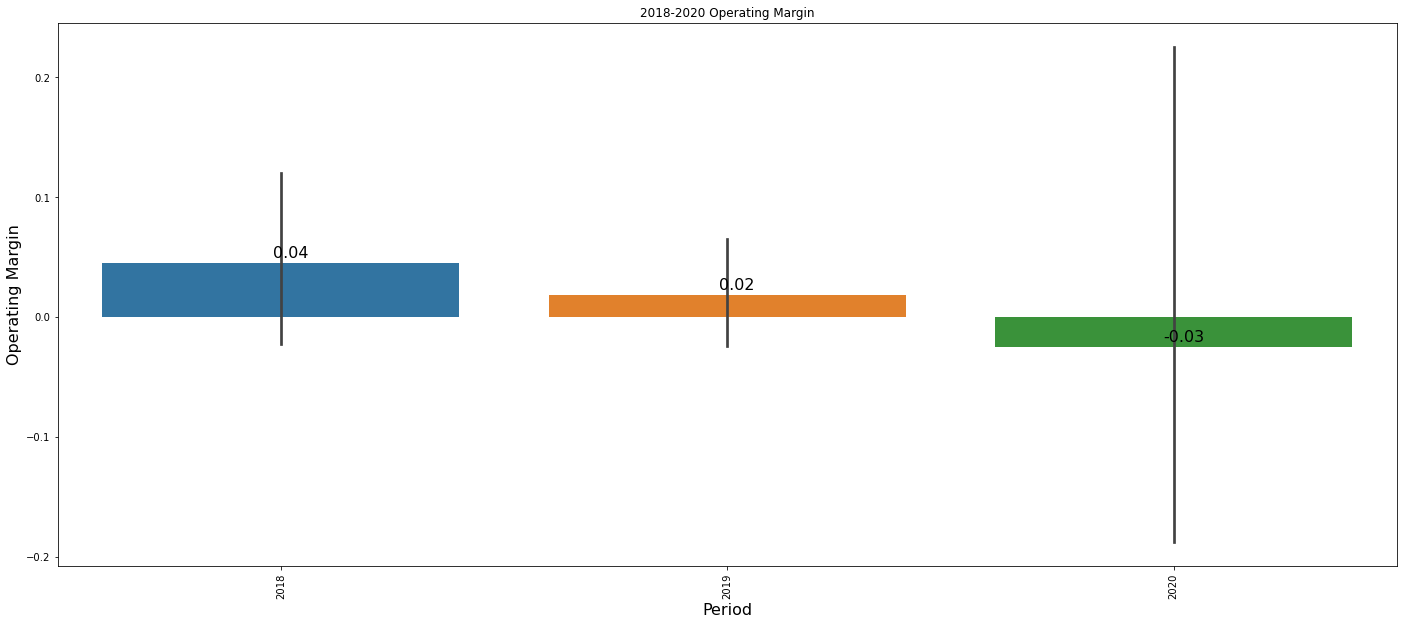

In [107]:
plt.figure(figsize=(24,10))
plots=sns.barplot(y= 'Operatingmargin', x = 'Period', data= Hy_df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=16, xytext=(10, 10),
                   textcoords='offset points')
    plt.xlabel("Period", size=16 )
    plt.ylabel("Operating Margin", size=16)
    plt.title("2018-2020 Operating Margin")
    plt.xticks(rotation=90) 
    plt.show


In [108]:
#hypothesis testing
#Does the operating profit increase in the 3 year period?
#H0:The operating profit doesnt increase
#H1:The operating profit does increase  

In [109]:
import random
random.seed (10)
sample_df = Hy_df.sample(12)

In [110]:
period_OM = pd.crosstab(Hy_df['Period'], Hy_df['Operatingmargin'])
period_OM

Operatingmargin,-0.233873,-0.135644,-0.048303,-0.045305,-0.039969,0.007098,0.021071,0.030374,0.043898,0.083823,0.149500,0.315856
Period,,,,,,,,,,,,
2018,0,0,0,1,0,0,0,1,1,0,1,0
2019,0,0,0,0,1,1,1,0,0,1,0,0
2020,1,1,1,0,0,0,0,0,0,0,0,1


In [111]:
# Perform a chi-square test with alpha 0.05
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(period_OM.to_numpy())

#Calculate critical value, set significance level to 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
print(f'Critical value: {critical_value}, test_statistic: {stat}, alpha: {1-prob}, p_value: {p}')

Critical value: 33.92443847144381, test_statistic: 24.0, alpha: 0.050000000000000044, p_value: 0.3472294175541719


In [112]:
#p value is greater than alpha thus lack of significant evidence, we fail to reject the null hypothesis with 95% confidence.
#This means that our sample did not provide sufficient evidence to conclude that the increase exists. However, at the same time, that lack of evidence doesn't prove that the increase does not exist.

In [113]:
# Is there an association between profit and cost of good
#H0:There is no association
#H1:There is association

In [114]:
profit_cog = pd.crosstab(Hy_df['COG'], Hy_df['Profit'])
profit_cog

Profit,-1230660.25,1199174.62,4097423.32,7097161.55,7626398.52,8272747.36,8959645.90,9334591.11,10567313.76,13278407.77,20361438.54,42131479.56
COG,,,,,,,,,,,,
16314404.09,0,0,0,0,0,0,0,1,0,0,0,0
17169812.82,0,0,0,0,0,0,0,0,1,0,0,0
27008714.21,0,0,0,0,1,0,0,0,0,0,0,0
30620587.92,0,0,1,0,0,0,0,0,0,0,0,0
37669324.50,0,1,0,0,0,0,0,0,0,0,0,0
43109056.45,0,0,0,0,0,0,1,0,0,0,0,0
47292449.58,0,0,0,0,0,0,0,0,0,1,0,0
52307976.84,0,0,0,1,0,0,0,0,0,0,0,0
53027308.00,0,0,0,0,0,1,0,0,0,0,0,0


In [115]:
# Perform a chi-square test with alpha 0.05
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(profit_cog.to_numpy())

#Calculate critical value, set significance level to 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
print(f'Critical value: {critical_value}, test_statistic: {stat}, alpha: {1-prob}, p_value: {p}')

Critical value: 147.67352976381804, test_statistic: 132.0, alpha: 0.050000000000000044, p_value: 0.23290755488982084


In [116]:
# Modelling

In [117]:
Hy_df.head()

,Revenue,COG,Expenses,Profit,BerryRatio,operatingprofit,Operatingmargin,Period
Q_1_2018,3.4718e+07,3.06206e+07,5.67032e+06,4.09742e+06,0.722608,-1.5729e+06,-0.045305,2018
Q_2_2018,2.77371e+07,1.71698e+07,6.42062e+06,1.05673e+07,1.64584,4.1467e+06,0.1495,2018
Q_3_2018,3.46351e+07,2.70087e+07,6.10597e+06,7.6264e+06,1.24901,1.52042e+06,0.0438984,2018
Q_4_2018,2.5649e+07,1.63144e+07,8.55553e+06,9.33459e+06,1.09106,779066,0.0303741,2018
Q_1_2019,6.13001e+07,5.30273e+07,7.83762e+06,8.27275e+06,1.05552,435132,0.00709839,2019


In [118]:
Hy_df.shape

(12, 8)

In [119]:
from sklearn.model_selection import train_test_split as tts
final_df= Hy_df
X = final_df.loc[:, final_df.columns != 'Operatingmargin']
Y = final_df['Period'].astype(np.int64)
num_var = final_df.select_dtypes(include=['float64']).columns
num_data = final_df[num_var]
obj_var = final_df.select_dtypes(include=['object']).columns
obj_data = final_df[obj_var]

In [120]:
# Encode categorical features
obj_data = pd.get_dummies(obj_data)
#Concatenate scaled and encoded features
X = np.concatenate((num_data, obj_data.to_numpy(dtype=np.float64)), axis=1)
x_train, x_test, y_train, y_test= tts(X, Y, test_size = 0.3, random_state=1)

In [121]:
print(x_train.shape, x_test.shape)

(8, 87) (4, 87)


In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [123]:
classifiers = {
"KNeighbors" : KNeighborsClassifier(),
"SVC" : SVC(),
"DecisionTree" : DecisionTreeClassifier(),
"RandomForest" : RandomForestClassifier(),
}

In [124]:
train_scores = []
test_scores = []
for key, classifier in classifiers.items():classifier.fit(x_train, y_train)
train_score = round(classifier.score(x_train, y_train),2)
train_scores.append(train_score)
test_score = round(classifier.score(x_test, y_test),2)
test_scores.append(test_score)
print(train_scores)
print(test_scores)

[1.0]
[1.0]


In [125]:
from sklearn.model_selection import cross_val_score
train_cross_scores = []
test_cross_scores = []
for key, classifier in classifiers.items():classifier.fit(x_train, y_train)
train_score = cross_val_score(classifier, x_train, y_train, cv=2)
train_cross_scores.append(round(train_score.mean(),2))
test_score = cross_val_score(classifier, x_test, y_test, cv=2)
test_cross_scores.append(round(test_score.mean(),2))
print(train_cross_scores)
print(test_cross_scores)

[0.25]
[0.5]


In [126]:
# Perform stratified sampling in the train test split
x1_train, x1_test, y1_train, y1_test = tts(X, Y, test_size = 0.3, random_state=1, stratify=Y)

In [127]:
# Load and fit better performing models
support_vector = SVC(probability=True).fit(x1_train, y1_train)
random_forest = RandomForestClassifier().fit(x1_train,y1_train)
y_pred_svc = support_vector.predict(x1_test)
y_pred_forest = random_forest.predict(x1_test)

In [128]:
# Evaluate models
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
print(" Support Vector Machine accuracy:",metrics.accuracy_score(y1_test, y_pred_svc))
print(" Random Forest accuracy:",metrics.accuracy_score(y1_test, y_pred_forest))

 Support Vector Machine accuracy: 0.5
 Random Forest accuracy: 1.0
